This notebook contains functionality to perform the following:

Exploring both `atac.expression_with_seq.tsv` and `athal_bac.intro.tsv`.

In [ ]:
x# mount google drive

from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/Shareddrives/NRC_Amii_Agronomics_Project/nrc-ml-plant-genomics/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/NRC_Amii_Agronomics_Project/nrc-ml-plant-genomics


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load in entire dataset if possible
# average all columns
# filter based on what David said:
#   threshold for open: top 1% excluding very top 0.1% -- ?? rows
#   threshold for closed: zero counts (?? rows)? Bottom 1% (?? rows)?
# save 

In [ ]:
# df_atac = pd.read_csv("data/raw/new_data/atac.expression_with_seq.tsv", sep="\t", nrows=10000000, header=None)
# df_atac = pd.read_csv("data/raw/new_data/atac.expression_with_seq.tsv", sep="\t", skiprows=lambda x: x % 4, header=None)  # read in every 8th row
df_atac = pd.read_csv("data/raw/new_data/atac.expression_with_seq.tsv", header=None)  # read in every 8th row

# samples = ["bud-green_rep1",
#            "bud-green_rep2",
#            "bud-yellow_rep1",
#            "bud-yellow_rep2",
#            "peduncle-down-15cm_rep1",
#            "peduncle-down-15cm_rep2",
#            "seed-21d_rep1",
#            "seed-21d_rep2",
#            "silique-1week_rep1",
#            "silique-1week_rep2",
#            "silique-2week_rep1",
#            "silique-2week_rep2",
#            "silique-3week_rep1",
#            "silique-3week_rep2",
#            "silique-4week_rep1",
#            "silique-4week_rep2",
#            "stem-down-15cm_rep1",
#            "stem-down-15cm_rep2"]

# column_names = ["ref", 
#                 "start_coord", 
#                 "end_coord",
#                 "sequence"]
                
# for item in samples:
#   column_names.append(item+"_raw")
#   column_names.append(item+"_norm")

# df_atac.columns = column_names

In [ ]:
df_atac.shape   # total shape of the dataset

(49145742, 1)

In [ ]:
int(df_atac.shape[0]/4)  # index of place we can split the dataset

12286435

### Start Test

In [ ]:
idx = 12286435
total_size = 49145742

In [ ]:
# https://thispointer.com/pandas-skip-rows-while-reading-csv-file-to-a-dataframe-using-read_csv-in-python/

# df_atac_chunk = pd.read_csv("data/raw/new_data/atac.expression_with_seq.tsv", sep="\t", skiprows=[i for i in range(0,3*idx)], header=None)  # skip first 3 chunks
df_atac_chunk = pd.read_csv("data/raw/new_data/atac.expression_with_seq.tsv", sep="\t", skiprows=[i for i in range(0,idx)]+[i for i in range(2*idx,total_size)], header=None)  # skip chunks 1, 2, 4 
# df_atac_chunk = pd.read_csv("data/raw/new_data/atac.expression_with_seq.tsv", sep="\t", skiprows=[i for i in range(0,2*idx)]+[i for i in range(3*idx,total_size)], header=None)  # skip chunks 1, 3, 4
# df_atac_chunk = pd.read_csv("data/raw/new_data/atac.expression_with_seq.tsv", sep="\t", skiprows=[i for i in range(2*idx,total_size)], header=None)  # skip chunks 2, 3, 4

samples = ["bud-green_rep1",
           "bud-green_rep2",
           "bud-yellow_rep1",
           "bud-yellow_rep2",
           "peduncle-down-15cm_rep1",
           "peduncle-down-15cm_rep2",
           "seed-21d_rep1",
           "seed-21d_rep2",
           "silique-1week_rep1",
           "silique-1week_rep2",
           "silique-2week_rep1",
           "silique-2week_rep2",
           "silique-3week_rep1",
           "silique-3week_rep2",
           "silique-4week_rep1",
           "silique-4week_rep2",
           "stem-down-15cm_rep1",
           "stem-down-15cm_rep2"]

column_names = ["ref", 
                "start_coord", 
                "end_coord",
                "sequence"]
                
for item in samples:
  column_names.append(item+"_raw")
  column_names.append(item+"_norm")

df_atac_chunk.columns = column_names
df_atac_chunk

In [ ]:
df_atac_chunk = df_atac_chunk[np.logical_not(df_atac_chunk.ref.isin(["chr_contigs", "napus_chloroplast", "napus_mitochondrion"]))]  # get rid of weirdo columns

In [ ]:
# calculate number of ns in each row
df_atac_chunk["num_n"] = df_atac_chunk.sequence.str.count("N")
df_atac_chunk["presence_n"] = [1 if "N" in s else 0 for s in df_atac_chunk.sequence]

# remove all rows that have an N in them
odds = [s for s in list(set("".join(df_atac_chunk.sequence))) if s not in ["A", "T", "C", "G"]]

mask = df_atac_chunk.sequence.str.contains("|".join(odds))  # true if contains weird characters, false if contains only ATCG
df_atac_chunk = df_atac_chunk[np.logical_not(mask)]  # keep only rows without weird characters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_atac_chunk["norm_read_avg"] = df_atac_chunk.iloc[:,[True if "_norm" in s else False for s in df_atac_chunk.columns]].mean(axis=1)
df_atac_chunk["raw_read_sum"] = df_atac_chunk.iloc[:,[True if "_raw" in s else False for s in df_atac_chunk.columns]].sum(axis=1)

In [ ]:
df_atac_chunk.shape

(5465712, 44)

In [ ]:
df_atac_chunk.head()

,ref,start_coord,end_coord,sequence,bud-green_rep1_raw,bud-green_rep1_norm,bud-green_rep2_raw,bud-green_rep2_norm,bud-yellow_rep1_raw,bud-yellow_rep1_norm,...,silique-4week_rep2_raw,silique-4week_rep2_norm,stem-down-15cm_rep1_raw,stem-down-15cm_rep1_norm,stem-down-15cm_rep2_raw,stem-down-15cm_rep2_norm,num_n,presence_n,norm_read_avg,raw_read_sum
0,N6,14276600,14276753,GAATCATAAATAAAAAGGAACAATCAGAAAATATTTGTTGGCTTCA...,1,1.300000e-08,6,7.260000e-08,11,9.490000e-08,...,12,1.460000e-07,6,5.490000e-08,3,4.000000e-08,0,0,6.328889e-08,109
1,N6,14276617,14276770,GAACAATCAGAAAATATTTGTTGGCTTCAACTGACTAGGTTTTTTT...,1,1.300000e-08,6,7.260000e-08,14,1.210000e-07,...,13,1.580000e-07,8,7.310000e-08,6,8.000000e-08,0,0,7.672222e-08,130
2,N6,14276634,14276787,TTGTTGGCTTCAACTGACTAGGTTTTTTTTTGTTTAATCAACCAAC...,1,1.300000e-08,6,7.260000e-08,14,1.210000e-07,...,11,1.340000e-07,8,7.310000e-08,6,8.000000e-08,0,0,7.555000e-08,128
3,N6,14276651,14276804,CTAGGTTTTTTTTTGTTTAATCAACCAACTGACCAAGTTTACCATC...,1,1.300000e-08,6,7.260000e-08,11,9.490000e-08,...,11,1.340000e-07,8,7.310000e-08,6,8.000000e-08,0,0,7.122778e-08,120
4,N6,14276668,14276821,TAATCAACCAACTGACCAAGTTTACCATCAAACATGCATTTGGATT...,1,1.300000e-08,6,7.260000e-08,11,9.490000e-08,...,11,1.340000e-07,9,8.230000e-08,6,8.000000e-08,0,0,7.251667e-08,122


In [ ]:
# chunk1 = df_atac_chunk[["ref", "start_coord",	"end_coord", "sequence", "norm_read_avg", "raw_read_sum"]]
chunk2 = df_atac_chunk[["ref", "start_coord",	"end_coord", "sequence", "norm_read_avg", "raw_read_sum"]]
# chunk3 = df_atac_chunk[["ref", "start_coord",	"end_coord", "sequence", "norm_read_avg", "raw_read_sum"]]
# chunk4 = df_atac_chunk[["ref", "start_coord",	"end_coord", "sequence", "norm_read_avg", "raw_read_sum"]]

In [ ]:
del df_atac_chunk

### End Test

In [ ]:
df_atac.shape

(12286436, 40)

In [ ]:
(df_atac["ref"] == "N1").all()

False

In [ ]:
df_atac.ref.unique()

In [ ]:
df_atac

,ref,start_coord,end_coord,sequence,bud-green_rep1_raw,bud-green_rep1_norm,bud-green_rep2_raw,bud-green_rep2_norm,bud-yellow_rep1_raw,bud-yellow_rep1_norm,...,silique-3week_rep2_raw,silique-3week_rep2_norm,silique-4week_rep1_raw,silique-4week_rep1_norm,silique-4week_rep2_raw,silique-4week_rep2_norm,stem-down-15cm_rep1_raw,stem-down-15cm_rep1_norm,stem-down-15cm_rep2_raw,stem-down-15cm_rep2_norm
0,N1,0,153,ATTATAGCTGCAAGCAATGTAATGTTTGTGCATTAACAGTTTCGAG...,2,2.600000e-08,1,1.210000e-08,4,3.450000e-08,...,0,0.000000e+00,3,2.310000e-08,0,0.000000e+00,1,9.140000e-09,2,2.670000e-08
1,N1,68,221,AAATTTATAGAGTAATCCACATTTTAACTAGAATGATTGAAAAAAT...,2,2.600000e-08,2,2.420000e-08,5,4.310000e-08,...,2,2.250000e-08,5,3.860000e-08,1,1.220000e-08,3,2.740000e-08,2,2.670000e-08
2,N1,136,289,AGATCATTTAACTAATTTAATTAAAAAGGAAATAATATTTTGGATA...,0,0.000000e+00,5,6.050000e-08,6,5.170000e-08,...,2,2.250000e-08,9,6.940000e-08,2,2.440000e-08,5,4.570000e-08,2,2.670000e-08
3,N1,204,357,CCATACGCAAATTAAAAGTAAATGAAAAGATTATGAATATTTTTGT...,12,1.560000e-07,7,8.470000e-08,7,6.040000e-08,...,2,2.250000e-08,15,1.160000e-07,4,4.880000e-08,4,3.660000e-08,6,8.000000e-08
4,N1,272,425,AAATGTAAAAAATAAAAATCCCAAAATAGCAAAAGTCAATTAATTT...,12,1.560000e-07,8,9.690000e-08,7,6.040000e-08,...,4,4.500000e-08,14,1.080000e-07,7,8.530000e-08,5,4.570000e-08,4,5.330000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12286431,napus_mitochondrion,221408,221561,AAAAGAAATCTACAGTTTTTGGTGGTTCATTTTTTTGTGAAAGAAA...,2545,3.300000e-05,3425,4.150000e-05,4050,3.490000e-05,...,2122,2.390000e-05,2560,1.970000e-05,2347,2.860000e-05,2938,2.690000e-05,1739,2.320000e-05
12286432,napus_mitochondrion,221476,221629,ACAGTTTCTCCTCCCACCTGAGGGCGAAGTCATGACTCGACTGAAA...,3024,3.920000e-05,3713,4.500000e-05,4234,3.650000e-05,...,2351,2.640000e-05,2455,1.890000e-05,2533,3.090000e-05,3048,2.790000e-05,1922,2.560000e-05
12286433,napus_mitochondrion,221544,221697,CGAGCATTTATTGCGAGAGGGAGAGGAGGGGTTTGACTTTTTCTGT...,3251,4.220000e-05,3854,4.670000e-05,4340,3.740000e-05,...,2440,2.740000e-05,2501,1.930000e-05,2601,3.170000e-05,3189,2.920000e-05,2077,2.770000e-05
12286434,napus_mitochondrion,221612,221765,TAAGTGCTTTCAGCCAGTTCTAGTCCTTTTCTTATACGCTTATTGG...,3128,4.060000e-05,3511,4.250000e-05,3932,3.390000e-05,...,2264,2.550000e-05,2211,1.700000e-05,2399,2.920000e-05,2943,2.690000e-05,1948,2.600000e-05


In [ ]:
df_atac.sequence.str.len()

0           153
1           153
2           153
3           153
4           153
           ... 
12286431    153
12286432    153
12286433    153
12286434    153
12286435    153
Name: sequence, Length: 12286436, dtype: int64

In [ ]:
df_atac.ref.unique()

array(['N1', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17',
       'N18', 'N19', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9',
       'chr_contigs', 'napus_chloroplast', 'napus_mitochondrion'],
      dtype=object)

In [ ]:
# proportion of counts that are zero
sum(df_atac["bud-green_rep1_raw"] == 0)/df_atac.shape[0]

0.15400877846106065

In [ ]:
# see what the top 0.1% of data looks like for bud-green_rep1_raw
x = sorted(df_atac["bud-green_rep1_raw"], reverse=True)[int(df_atac.shape[0]*0.01):int(df_atac.shape[0])]
len(x)

12163572

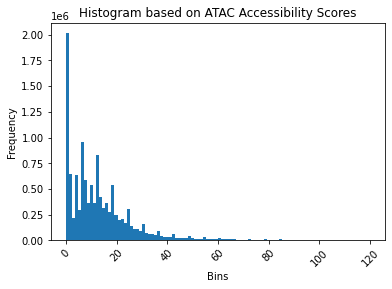

In [ ]:
# explore distribution of top 0.1% of counts 

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(x, bins=100)

plt.xticks(rotation=45)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Histogram based on ATAC Accessibility Scores")

plt.show()

# (I assume histogram of norm'd counts will look the same)

Here is the A. thaliana data that's now 153 bp, but it's only a small bit. What's that all about?

In [ ]:
df_athal = pd.read_csv("data/raw/new_data/athal_bac.intro.tsv", sep="\t", header=None)

In [ ]:
df_athal

,0,1,2,3,4,5,6,7
0,AC002387.3,0,153,GAATTCTTAAGATTGATCTGAGTTTTCCTCTTACACCGAATGTTTC...,4262,7216,1400.73,1756.21
1,AC002387.3,17,170,CTGAGTTTTCCTCTTACACCGAATGTTTCAGAAGAAGCCAAAAATC...,4504,8209,1480.27,1997.88
2,AC002387.3,34,187,ACCGAATGTTTCAGAAGAAGCCAAAAATCTTATCAGTCAGGTACAC...,4975,8776,1635.07,2135.88
3,AC002387.3,51,204,AAGCCAAAAATCTTATCAGTCAGGTACACACCCAACCAAGCTAAAG...,5523,9380,1815.17,2282.88
4,AC002387.3,68,221,AGTCAGGTACACACCCAACCAAGCTAAAGCATACCCACAACGACTC...,5854,10016,1923.96,2437.67
...,...,...,...,...,...,...,...,...
7218,AC002387.3,122706,122859,ACATGATCAACAAAAGGTACTTACTTCTTCTTGTCTATATTTGGGA...,5304,9203,1743.19,2239.80
7219,AC002387.3,122723,122876,TACTTACTTCTTCTTGTCTATATTTGGGACTTCACTTTTCTCAGCC...,4926,8455,1618.96,2057.76
7220,AC002387.3,122740,122893,CTATATTTGGGACTTCACTTTTCTCAGCCTTTTCCACAATCACCTG...,4461,8143,1466.14,1981.82
7221,AC002387.3,122757,122910,CTTTTCTCAGCCTTTTCCACAATCACCTGCAACCAAACTACAATGT...,4005,7426,1316.27,1807.32


In [ ]:
len(df_athal[3][0])

153

In [ ]:
column_names = ["ref", 
                "start_coord", 
                "end_coord", 
                "sequence", 
                "raw_control_coverage", 
                "raw_treatment_coverage", 
                "norm_control_coverage", 
                "norm_treatment_coverage"]

df_athal.columns = column_names

In [ ]:
df_athal

,ref,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage
0,AC002387.3,0,153,GAATTCTTAAGATTGATCTGAGTTTTCCTCTTACACCGAATGTTTC...,4262,7216,1400.73,1756.21
1,AC002387.3,17,170,CTGAGTTTTCCTCTTACACCGAATGTTTCAGAAGAAGCCAAAAATC...,4504,8209,1480.27,1997.88
2,AC002387.3,34,187,ACCGAATGTTTCAGAAGAAGCCAAAAATCTTATCAGTCAGGTACAC...,4975,8776,1635.07,2135.88
3,AC002387.3,51,204,AAGCCAAAAATCTTATCAGTCAGGTACACACCCAACCAAGCTAAAG...,5523,9380,1815.17,2282.88
4,AC002387.3,68,221,AGTCAGGTACACACCCAACCAAGCTAAAGCATACCCACAACGACTC...,5854,10016,1923.96,2437.67
...,...,...,...,...,...,...,...,...
7218,AC002387.3,122706,122859,ACATGATCAACAAAAGGTACTTACTTCTTCTTGTCTATATTTGGGA...,5304,9203,1743.19,2239.80
7219,AC002387.3,122723,122876,TACTTACTTCTTCTTGTCTATATTTGGGACTTCACTTTTCTCAGCC...,4926,8455,1618.96,2057.76
7220,AC002387.3,122740,122893,CTATATTTGGGACTTCACTTTTCTCAGCCTTTTCCACAATCACCTG...,4461,8143,1466.14,1981.82
7221,AC002387.3,122757,122910,CTTTTCTCAGCCTTTTCCACAATCACCTGCAACCAAACTACAATGT...,4005,7426,1316.27,1807.32


In [ ]:
df_athal["target"] = np.log2(df_athal.norm_control_coverage/df_athal.norm_treatment_coverage)

In [ ]:
df_athal

,ref,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,target
0,AC002387.3,0,153,GAATTCTTAAGATTGATCTGAGTTTTCCTCTTACACCGAATGTTTC...,4262,7216,1400.73,1756.21,-0.326286
1,AC002387.3,17,170,CTGAGTTTTCCTCTTACACCGAATGTTTCAGAAGAAGCCAAAAATC...,4504,8209,1480.27,1997.88,-0.432610
2,AC002387.3,34,187,ACCGAATGTTTCAGAAGAAGCCAAAAATCTTATCAGTCAGGTACAC...,4975,8776,1635.07,2135.88,-0.385478
3,AC002387.3,51,204,AAGCCAAAAATCTTATCAGTCAGGTACACACCCAACCAAGCTAAAG...,5523,9380,1815.17,2282.88,-0.330750
4,AC002387.3,68,221,AGTCAGGTACACACCCAACCAAGCTAAAGCATACCCACAACGACTC...,5854,10016,1923.96,2437.67,-0.341424
...,...,...,...,...,...,...,...,...,...
7218,AC002387.3,122706,122859,ACATGATCAACAAAAGGTACTTACTTCTTCTTGTCTATATTTGGGA...,5304,9203,1743.19,2239.80,-0.361640
7219,AC002387.3,122723,122876,TACTTACTTCTTCTTGTCTATATTTGGGACTTCACTTTTCTCAGCC...,4926,8455,1618.96,2057.76,-0.346007
7220,AC002387.3,122740,122893,CTATATTTGGGACTTCACTTTTCTCAGCCTTTTCCACAATCACCTG...,4461,8143,1466.14,1981.82,-0.434803
7221,AC002387.3,122757,122910,CTTTTCTCAGCCTTTTCCACAATCACCTGCAACCAAACTACAATGT...,4005,7426,1316.27,1807.32,-0.457397


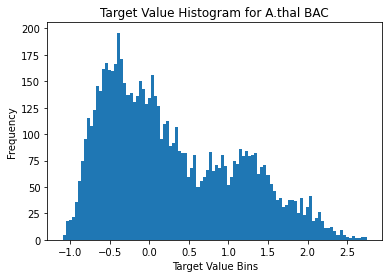

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(df_athal.target, bins=100)
plt.xlabel("Target Value Bins")
plt.ylabel("Frequency")
plt.title("Target Value Histogram for A.thal BAC")
plt.show()